In [164]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

folder_path = os.path.join('project_data', 'stocks')
icln_plots = os.path.join('plots', 'icln')

ticker = "ICLN"
print(f"Downloading {ticker}...")

try:
    icln = yf.download(ticker, period="max", progress=False)

    print(f"Downloaded {len(icln)} records from {icln.index[0].date()} to {icln.index[-1].date()}")

    file_path = os.path.join(folder_path, f'{ticker}_data.csv')
    icln.to_csv(file_path)

except Exception as e:
    print(f"Error: {e}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_17528\2337369455.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  icln = yf.download(ticker, period="max", progress=False)


Downloaded 4283 records from 2008-06-25 to 2025-07-03


In [165]:
print(f"Columns: {list(icln.columns)}")
print(f"Shape: {icln.shape}")

Columns: [('Close', 'ICLN'), ('High', 'ICLN'), ('Low', 'ICLN'), ('Open', 'ICLN'), ('Volume', 'ICLN')]
Shape: (4283, 5)


In [166]:
print("First 5 rows:")
print(icln.head())

print("\nLast 5 rows:")
print(icln.tail())

print("\nMissing values:")
print(icln.isnull().sum())

price_col = "Close"

print(f"\nPrice statistics:")
print(icln[price_col].describe())

First 5 rows:
Price           Close       High        Low       Open Volume
Ticker           ICLN       ICLN       ICLN       ICLN   ICLN
Date                                                         
2008-06-25  37.128708  37.276462  36.762838  36.762838   2000
2008-06-26  35.925541  42.215676  35.876290  42.215676   9800
2008-06-27  35.292324  35.735590  35.243073  35.735590   7700
2008-06-30  35.355640  35.855192  35.355640  35.721510  17100
2008-07-01  34.335438  35.179752  33.814779  35.179752  14900

Last 5 rows:
Price       Close   High    Low   Open   Volume
Ticker       ICLN   ICLN   ICLN   ICLN     ICLN
Date                                           
2025-06-27  13.02  13.12  12.93  13.12  2442900
2025-06-30  13.11  13.14  12.93  12.96  3510300
2025-07-01  13.22  13.30  13.01  13.12  5722500
2025-07-02  13.43  13.53  13.27  13.31  3992200
2025-07-03  13.83  13.87  13.55  13.55  3723400

Missing values:
Price   Ticker
Close   ICLN      0
High    ICLN      0
Low     ICLN      0


Plot saved to plots\icln\ICLN_price_plot.png


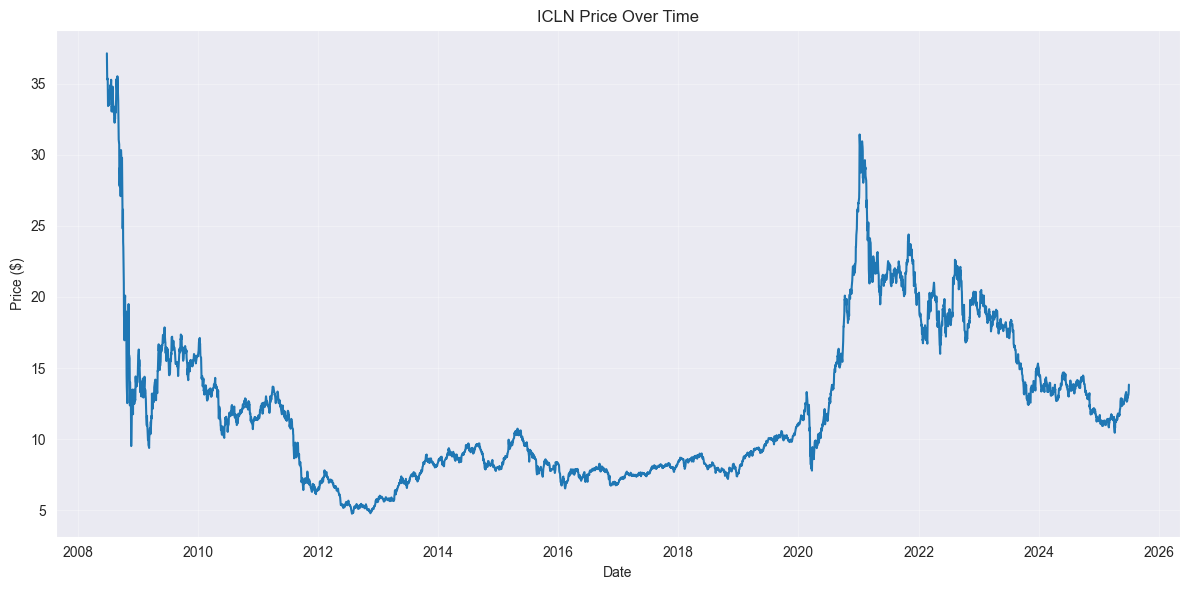

In [167]:
plt.figure(figsize=(12, 6))
plt.plot(icln.index, icln[price_col])
plt.title(f'{ticker} Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, f'{ticker}_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Volume plot saved to plots\icln\ICLN_volume_plot.png


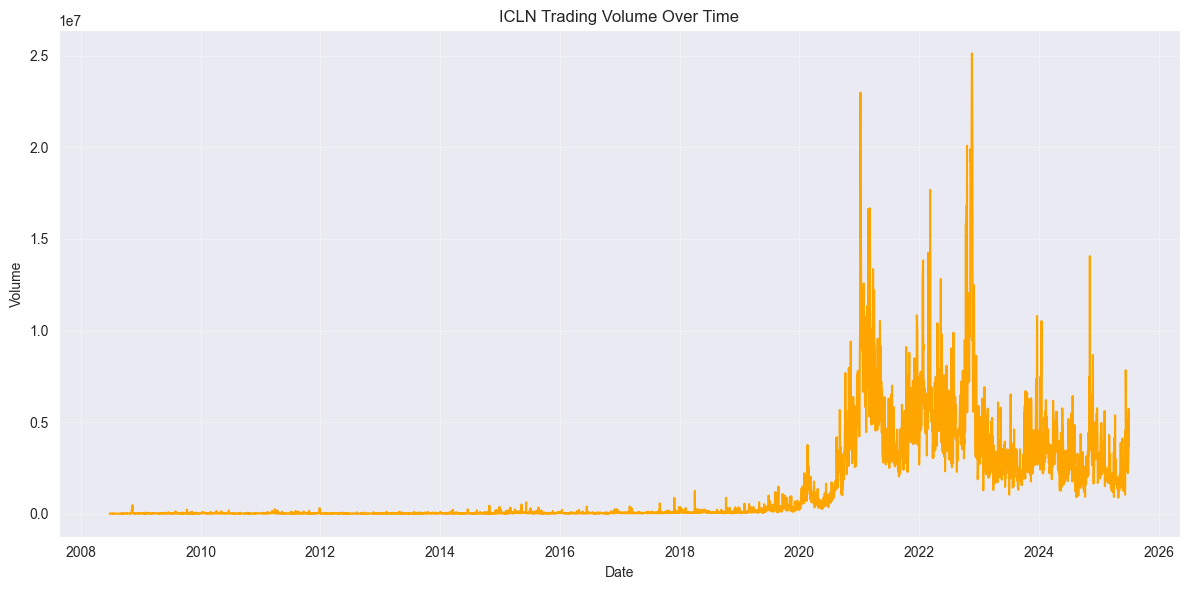

In [168]:
volume_col = 'Volume'

plt.figure(figsize=(12, 6))
plt.plot(icln.index, icln[volume_col], color='orange')
plt.title(f'ICLN Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, f'ICLN_volume_plot.png')
plt.savefig(plot_path)
print(f"Volume plot saved to {plot_path}")

plt.show()

Volume dramatically increased starting around 2020, coinciding with retail investor interest in clean energy and ESG investing boom. Unlike BGRN's random volume spikes, ICLN shows a structural shift in trading activity.

This resource is helpful: https://www.iea.org/reports/world-energy-investment-2021/executive-summary

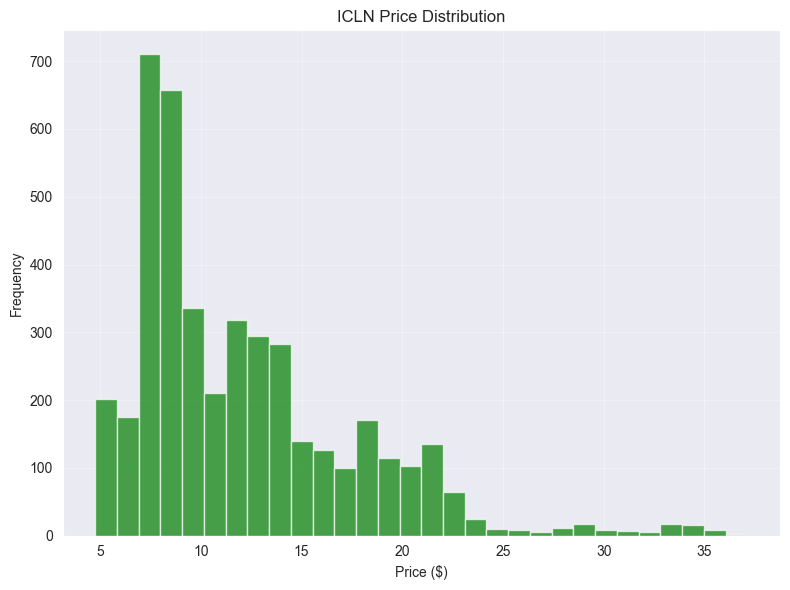

In [169]:
plt.figure(figsize=(8, 6))
plt.hist(icln[price_col], bins=30, alpha=0.7, color='green')
plt.title(f'{ticker} Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Right-skewed distribution with most trading days below $12, showing the sector's growth phase.

Plot saved to plots\icln\ICLN_daily_price_range.png


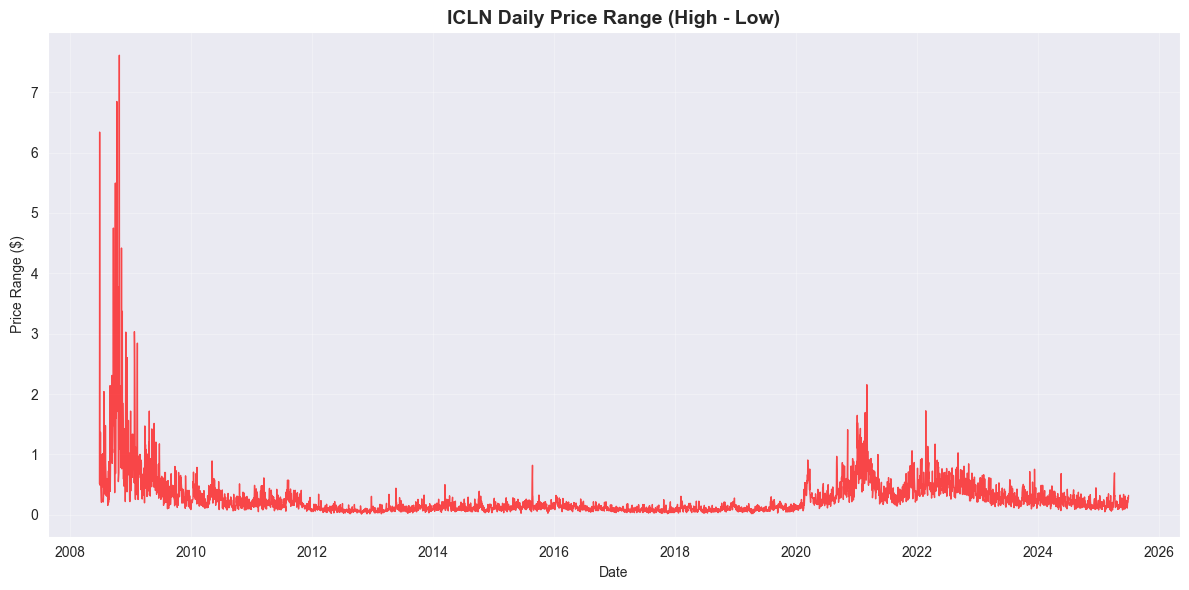

In [170]:
icln_daily_range = icln['High'] - icln['Low']

plt.figure(figsize=(12, 6))

plt.plot(icln.index, icln_daily_range, linewidth=1, color='red', alpha=0.7)
plt.title('ICLN Daily Price Range (High - Low)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price Range ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, 'ICLN_daily_price_range.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Extreme volatility spikes in 2008-2009 (financial crisis) and 2020-2021 (COVID/clean energy boom), then 2022+ (interest rate shocks). Much higher intraday volatility than BGRN, typical for growth sector equities.

In [171]:
daily_returns = icln[price_col].pct_change().dropna()
annual_volatility = daily_returns.std() * np.sqrt(252)

print(f"ICLN annual volatility: {annual_volatility['ICLN']:.1%}")

ICLN annual volatility: 32.8%


In [172]:
avg_daily_change = abs(daily_returns).mean()
print(f"Average daily price movement: {avg_daily_change['ICLN']:.2%}")

Average daily price movement: 1.37%


In [173]:
print("Downloading benchmark data...")

benchmark_indices = ["SPY", "SPLV"]

spy = yf.download(benchmark_indices[0], period="max", progress=False)
splv = yf.download(benchmark_indices[1], period="max", progress=False)

spy.to_csv(os.path.join(folder_path, f'{benchmark_indices[0]}_data.csv'))
splv.to_csv(os.path.join(folder_path, f'{benchmark_indices[1]}_data.csv'))

print(f"{benchmark_indices[0]}: {len(spy)} records from {spy.index[0].date()} to {spy.index[-1].date()}")
print(f"{benchmark_indices[1]}: {len(splv)} records from {splv.index[0].date()} to {splv.index[-1].date()}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_17528\1569303940.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download(benchmark_indices[0], period="max", progress=False)
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_17528\1569303940.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  splv = yf.download(benchmark_indices[1], period="max", progress=False)


SPY: 8163 records from 1993-01-29 to 2025-07-03
SPLV: 3562 records from 2011-05-05 to 2025-07-03


In [174]:
common_start = max(icln.index[0], spy.index[0], splv.index[0])
common_end = min(icln.index[-1], spy.index[-1], splv.index[-1])

print(f"Comparing over common period: {common_start.date()} to {common_end.date()}")

icln_common = icln[common_start:common_end]
spy_common = spy[common_start:common_end]
splv_common = splv[common_start:common_end]

icln_returns = icln_common[price_col].pct_change().dropna()
spy_returns = spy_common[price_col].pct_change().dropna()
splv_returns = splv_common[price_col].pct_change().dropna()

icln_vol = icln_returns.std() * np.sqrt(252)
spy_vol = spy_returns.std() * np.sqrt(252)
splv_vol = splv_returns.std() * np.sqrt(252)

icln_daily = abs(icln_returns).mean()
spy_daily = abs(spy_returns).mean()
splv_daily = abs(splv_returns).mean()

print(f"Period: {len(icln_returns)} trading days")
print()
print("Annual Volatility:")
print(f"ICLN (Clean Energy ETF):      {icln_vol['ICLN']:.2%}")
print(f"SPY (S&P 500):                {spy_vol['SPY']:.2%}")
print(f"SPLV (S&P 500 Low Vol):       {splv_vol['SPLV']:.2%}")
print()
print("Average Daily Movement:")
print(f"ICLN:  {icln_daily['ICLN']:.2%}")
print(f"SPY:   {spy_daily['SPY']:.2%}")
print(f"SPLV:  {splv_daily['SPLV']:.2%}")
print()
print(f"ICLN vs SPY: {icln_vol['ICLN']/spy_vol['SPY']:.2f}x the volatility")
print(f"ICLN vs SPLV: {icln_vol['ICLN']/splv_vol['SPLV']:.2f}x the volatility")
print(f"SPLV vs SPY: {splv_vol['SPLV']/spy_vol['SPY']:.2f}x the volatility")

Comparing over common period: 2011-05-05 to 2025-07-03
Period: 3561 trading days

Annual Volatility:
ICLN (Clean Energy ETF):      26.91%
SPY (S&P 500):                17.45%
SPLV (S&P 500 Low Vol):       14.75%

Average Daily Movement:
ICLN:  1.21%
SPY:   0.73%
SPLV:  0.60%

ICLN vs SPY: 1.54x the volatility
ICLN vs SPLV: 1.82x the volatility
SPLV vs SPY: 0.85x the volatility


Plot saved to plots\icln\stock_comparison_price_plot.png


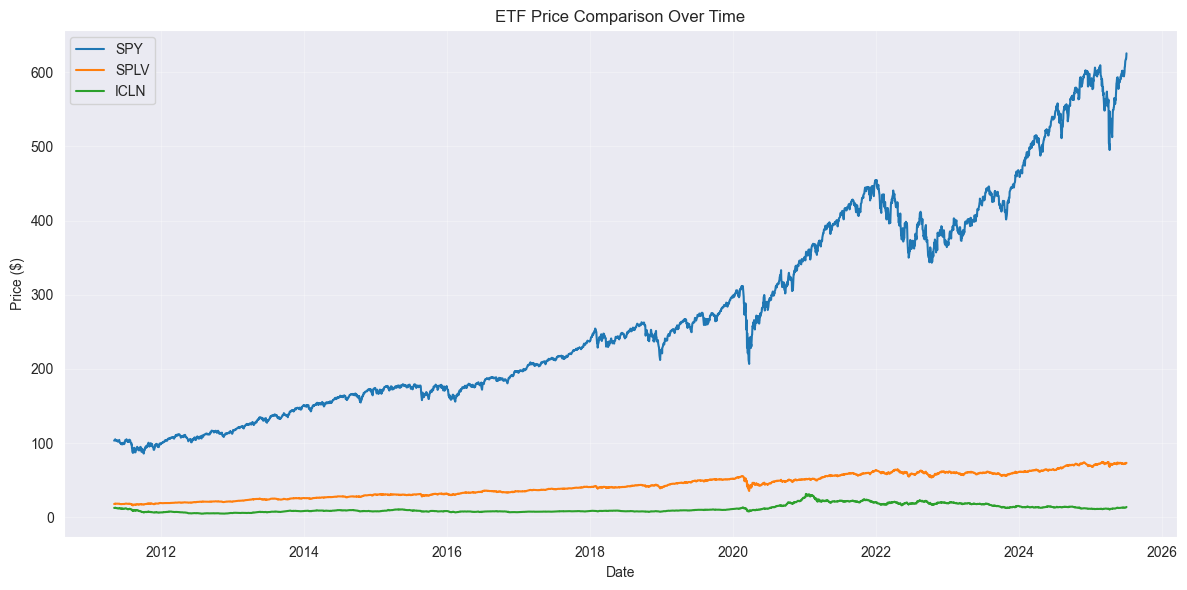

In [193]:
plt.figure(figsize=(12, 6))

plt.plot(spy_common.index, spy_common[price_col], label=benchmark_indices[0])
plt.plot(splv_common.index, splv_common[price_col], label=benchmark_indices[1])
plt.plot(icln_common.index, icln_common[price_col], label=ticker)

plt.title("ETF Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, 'stock_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\icln\normalized_stock_comparison_price_plot.png


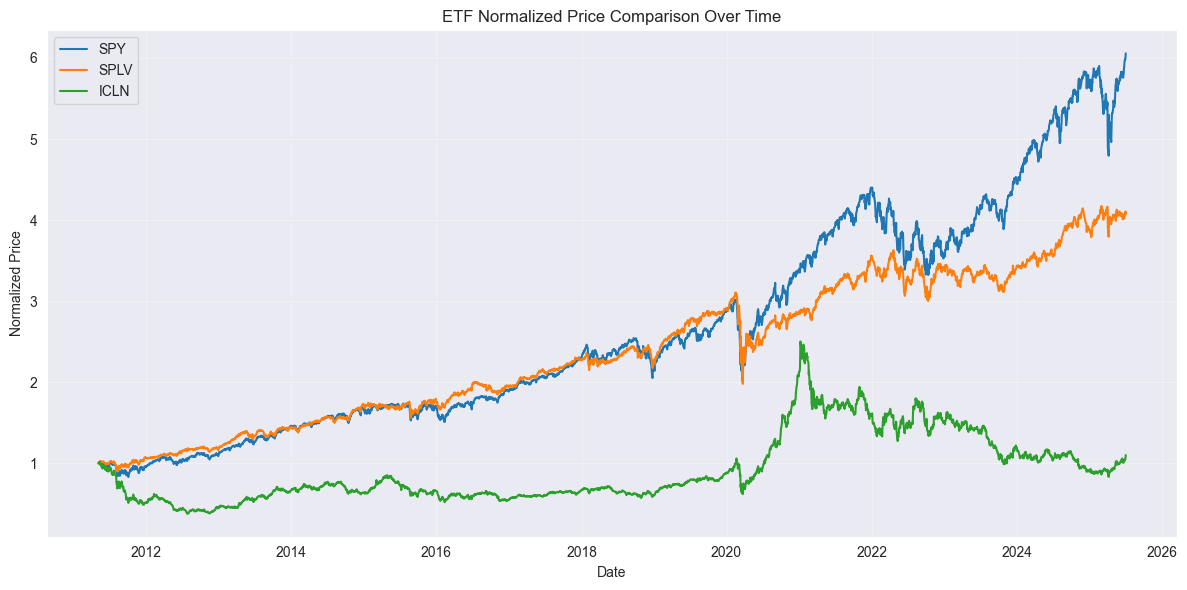

In [176]:
spy_norm = spy_common[price_col] / spy_common[price_col].iloc[0]
splv_norm = splv_common[price_col] / splv_common[price_col].iloc[0]
icln_norm = icln_common[price_col] / icln_common[price_col].iloc[0]

plt.figure(figsize=(12, 6))

plt.plot(spy_common.index, spy_norm, label=benchmark_indices[0])
plt.plot(splv_common.index, splv_norm, label=benchmark_indices[1])
plt.plot(icln_common.index, icln_norm, label=ticker)

plt.title("ETF Normalized Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Normalized Price')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, 'normalized_stock_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

In [177]:
qcln = yf.download("QCLN", period="max", progress=False)  # NASDAQ Clean Edge Green Energy
vgt = yf.download("VGT", period="max", progress=False)    # Vanguard Technology ETF
xt = yf.download("XLI", period="max", progress=False)     # Industrial Select Sector

for ticker_new, data in [("QCLN", qcln), ("VGT", vgt), ("XLI", xt)]:
    data.to_csv(os.path.join(folder_path, f'{ticker_new}_data.csv'))
    print(f"{ticker_new}: {len(data)} records from {data.index[0].date()} to {data.index[-1].date()}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_17528\285357395.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qcln = yf.download("QCLN", period="max", progress=False)  # NASDAQ Clean Edge Green Energy
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_17528\285357395.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vgt = yf.download("VGT", period="max", progress=False)    # Vanguard Technology ETF
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_17528\285357395.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  xt = yf.download("XLI", period="max", progress=False)     # Industrial Select Sector


QCLN: 4626 records from 2007-02-14 to 2025-07-03
VGT: 5391 records from 2004-01-30 to 2025-07-03
XLI: 6673 records from 1998-12-22 to 2025-07-03


QCLN represents another clean energy ETF focused on NASDAQ-listed companies for comparison.

VGT represents the technology sector, which often correlates with clean energy innovation.

XLI represents industrials, which includes traditional energy and infrastructure companies.

In [178]:
common_start_eq = max(icln.index[0], spy.index[0], qcln.index[0], vgt.index[0], xt.index[0])
common_end_eq = min(icln.index[-1], spy.index[-1], qcln.index[-1], vgt.index[-1], xt.index[-1])

equity_data = {}
for name, df in [("ICLN", icln), ("SPY", spy), ("QCLN", qcln), ("VGT", vgt), ("XLI", xt)]:
    equity_data[name] = df[common_start_eq:common_end_eq][price_col]

equity_prices = pd.concat(equity_data.values(), axis=1)
equity_prices.columns = equity_data.keys()

print(f"Analysis period: {common_start_eq.date()} to {common_end_eq.date()}")
print(f"Total observations: {len(equity_prices)}")

Analysis period: 2008-06-25 to 2025-07-03
Total observations: 4283


Plot saved to plots\icln\equity_comparison_price_plot.png


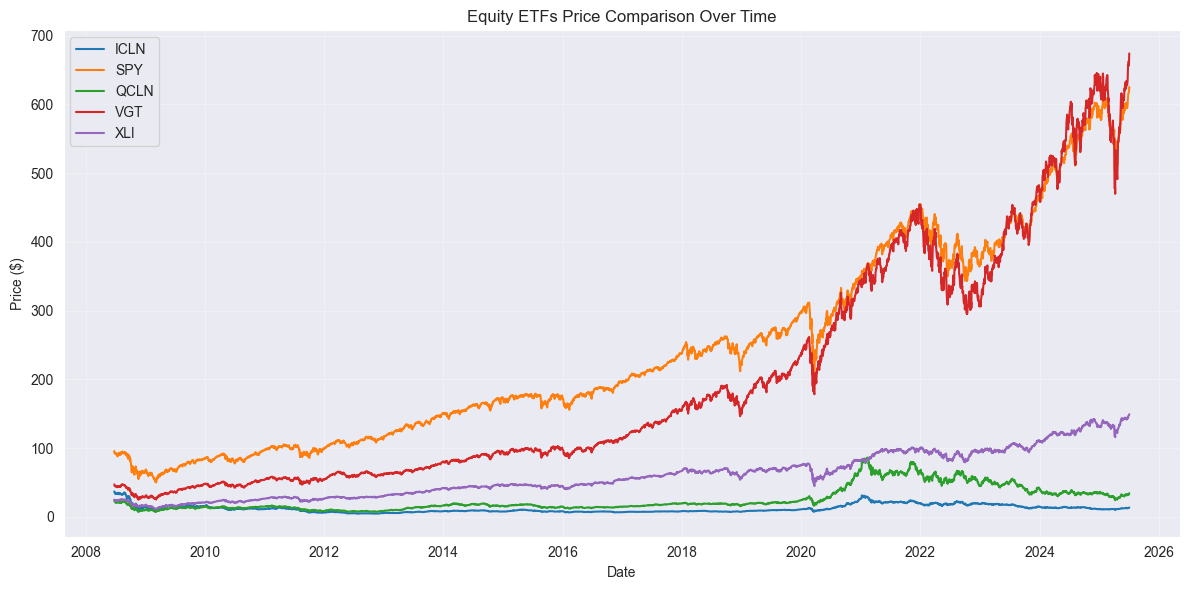

In [179]:
plt.figure(figsize=(12, 6))

plt.plot(equity_prices.index, equity_prices['ICLN'], label='ICLN')
plt.plot(equity_prices.index, equity_prices['SPY'], label='SPY')
plt.plot(equity_prices.index, equity_prices['QCLN'], label='QCLN')
plt.plot(equity_prices.index, equity_prices['VGT'], label='VGT')
plt.plot(equity_prices.index, equity_prices['XLI'], label='XLI')

plt.title("Equity ETFs Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, 'equity_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\icln\normalized_equity_comparison_price_plot.png


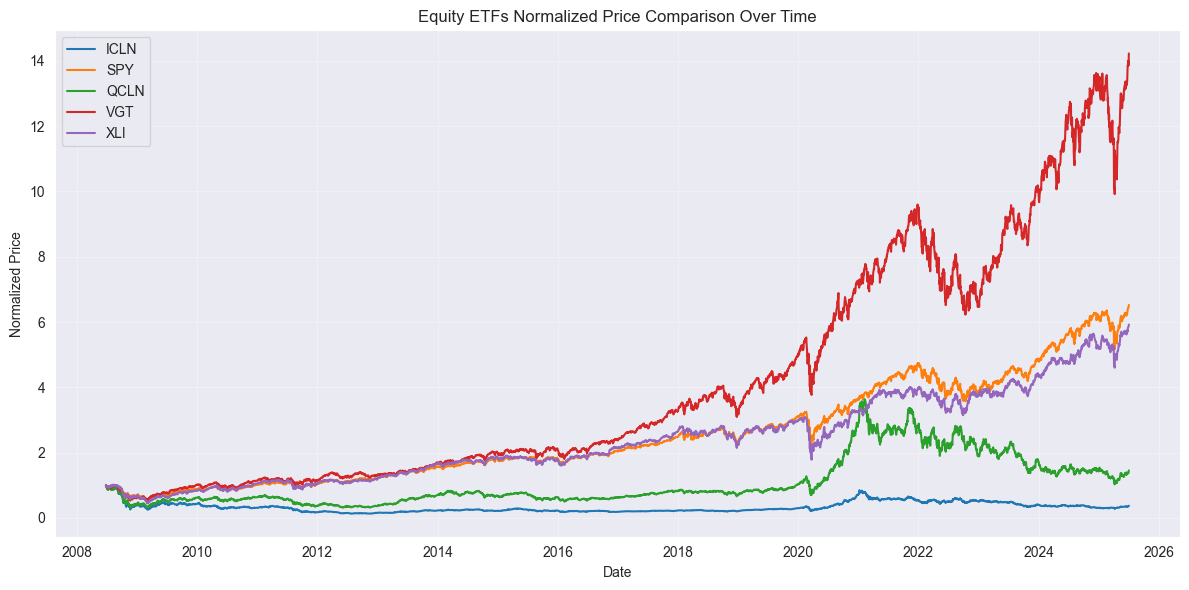

In [180]:
equity_norm = equity_prices / equity_prices.iloc[0]

plt.figure(figsize=(12, 6))

plt.plot(equity_norm.index, equity_norm['ICLN'], label='ICLN')
plt.plot(equity_norm.index, equity_norm['SPY'], label='SPY')
plt.plot(equity_norm.index, equity_norm['QCLN'], label='QCLN')
plt.plot(equity_norm.index, equity_norm['VGT'], label='VGT')
plt.plot(equity_norm.index, equity_norm['XLI'], label='XLI')

plt.title("Equity ETFs Normalized Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Normalized Price')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, 'normalized_equity_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Not sure what I see.

Plot saved to plots\icln\equity_daily_returns_comparison_plot.png


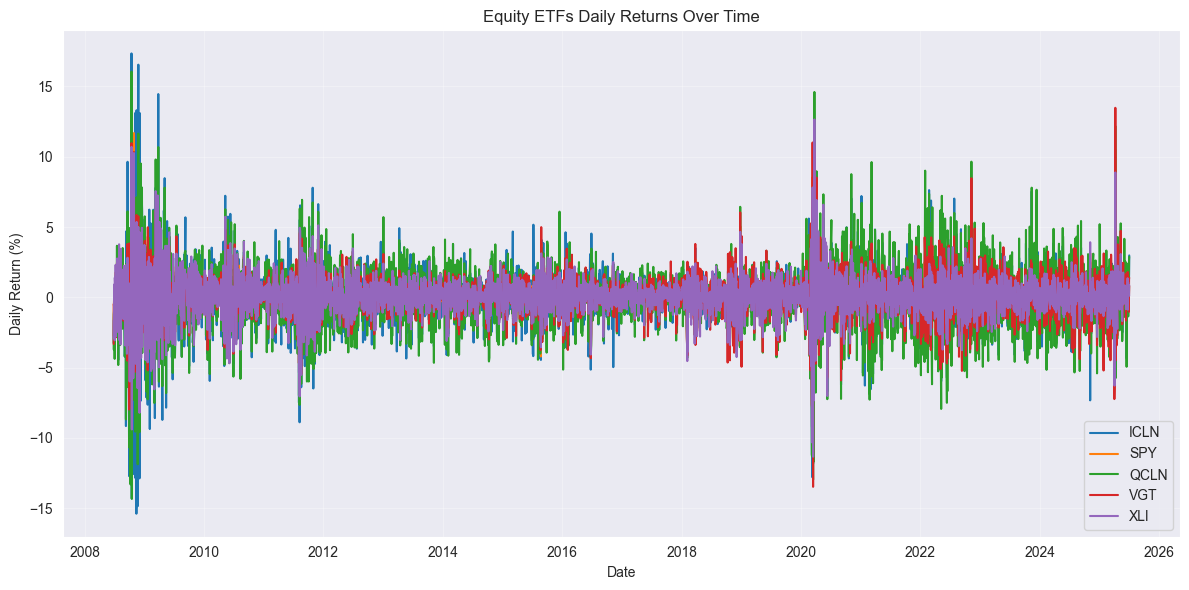

In [181]:
equity_returns = equity_prices.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))

plt.plot(equity_returns.index, equity_returns['ICLN'], label='ICLN')
plt.plot(equity_returns.index, equity_returns['SPY'], label='SPY')
plt.plot(equity_returns.index, equity_returns['QCLN'], label='QCLN')
plt.plot(equity_returns.index, equity_returns['VGT'], label='VGT')
plt.plot(equity_returns.index, equity_returns['XLI'], label='XLI')

plt.title("Equity ETFs Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, 'equity_daily_returns_comparison_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\icln\ICLN_SPY_daily_returns_comparison_plot.png


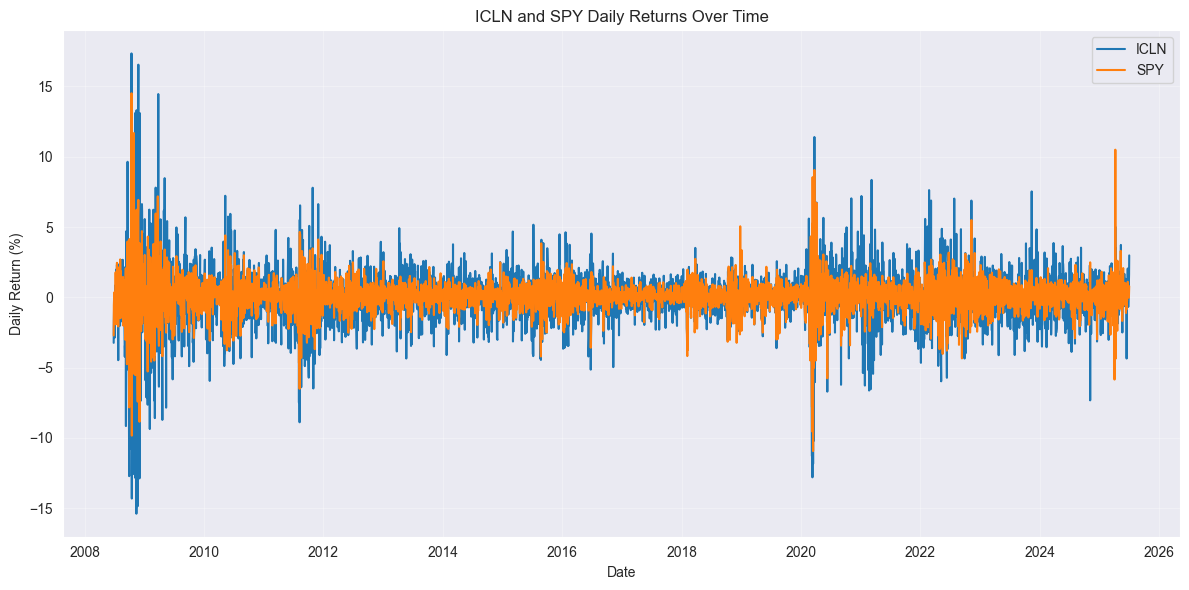

In [182]:
plt.figure(figsize=(12, 6))

plt.plot(equity_returns.index, equity_returns['ICLN'], label='ICLN')
plt.plot(equity_returns.index, equity_returns['SPY'], label='SPY')

plt.title("ICLN and SPY Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, 'ICLN_SPY_daily_returns_comparison_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

 ICLN shows higher amplitude returns than SPY but similar patterns during crisis periods. Both move together during major market events, confirming ICLN's integration with broader equity markets. The fact that ICLN is more volatile than SPY was stated earlier backed up by calculations.

Plot saved to plots\icln\ICLN_daily_returns_plot.png


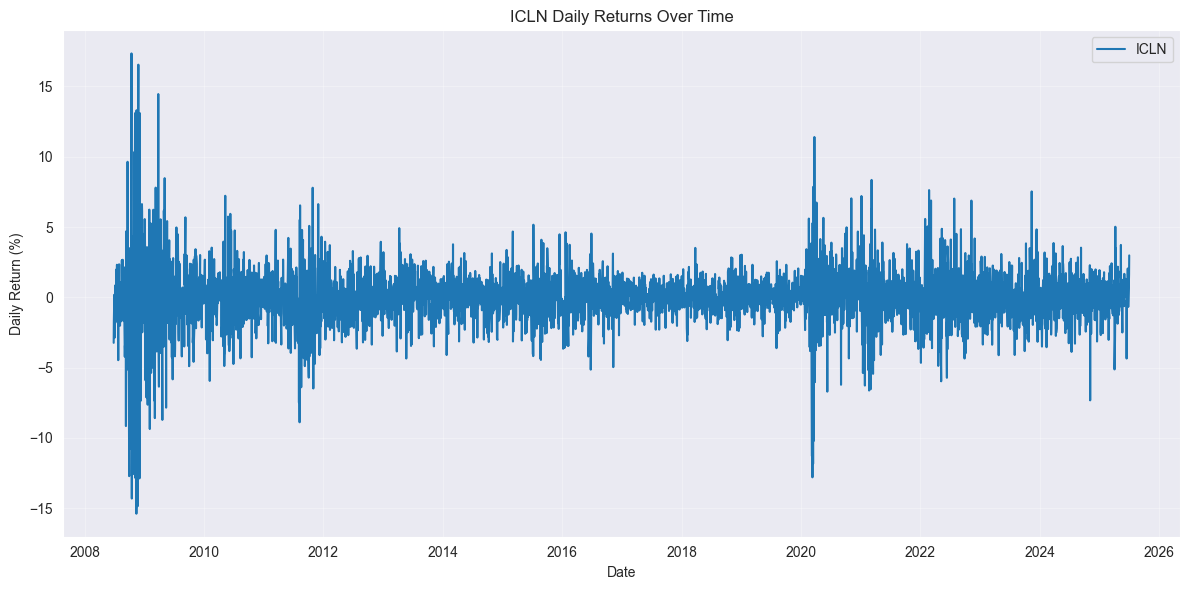

In [183]:
plt.figure(figsize=(12, 6))

plt.plot(equity_returns.index, equity_returns['ICLN'], label='ICLN')

plt.title("ICLN Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, 'ICLN_daily_returns_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\icln\ICLN_rolling_volatility_plot.png


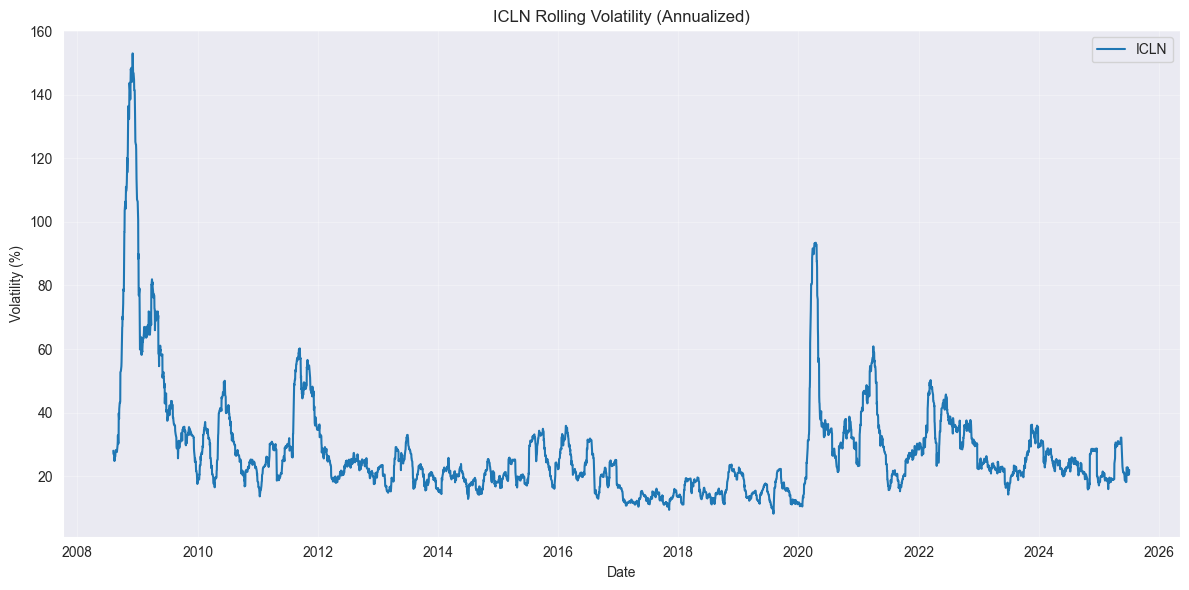

In [184]:
plt.figure(figsize=(12, 6))

plt.plot(equity_returns.index, equity_returns['ICLN'].rolling(window=30).std() * np.sqrt(252), label='ICLN')

plt.title("ICLN Rolling Volatility (Annualized)")
plt.xlabel('Date')
plt.ylabel('Volatility (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, 'ICLN_rolling_volatility_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Extreme volatility spikes >150% during 2008 crisis and ~95% during COVID. Recent volatility has normalized to 20-30% range, suggesting sector maturation.

Plot saved to plots\icln\equity_weekly_returns_comparison_plot.png


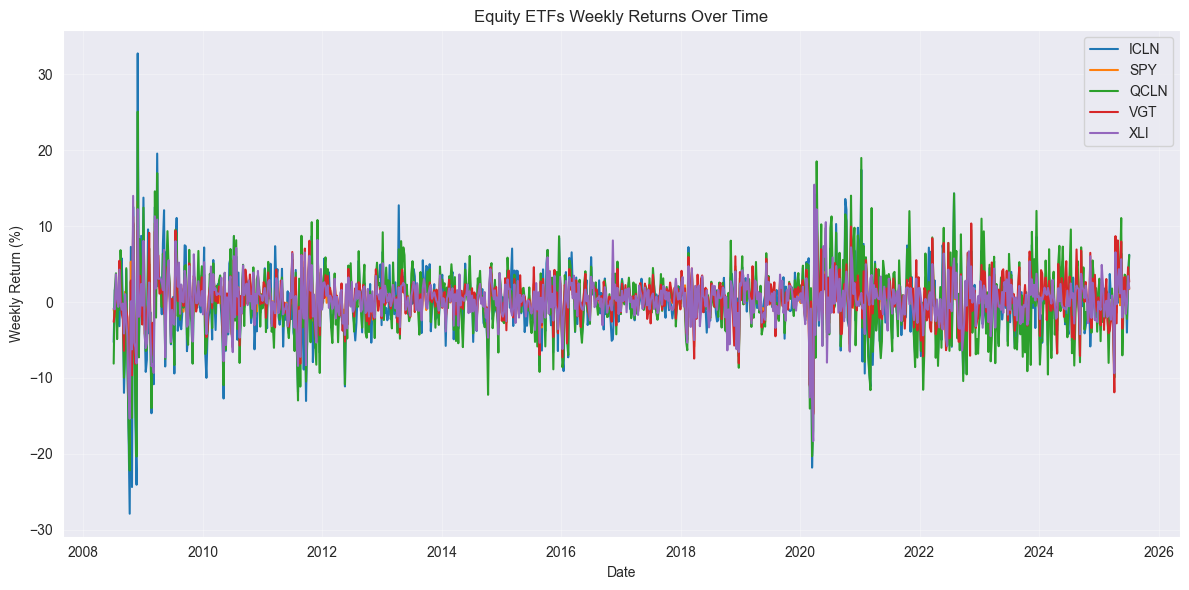

In [185]:
weekly_equity_prices = equity_prices.resample('W').last()
equity_log_returns = weekly_equity_prices.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))

plt.plot(equity_log_returns.index, equity_log_returns['ICLN'], label='ICLN')
plt.plot(equity_log_returns.index, equity_log_returns['SPY'], label='SPY')
plt.plot(equity_log_returns.index, equity_log_returns['QCLN'], label='QCLN')
plt.plot(equity_log_returns.index, equity_log_returns['VGT'], label='VGT')
plt.plot(equity_log_returns.index, equity_log_returns['XLI'], label='XLI')

plt.title("Equity ETFs Weekly Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Weekly Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(icln_plots, 'equity_weekly_returns_comparison_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

In [186]:
correlation_matrix = equity_returns.corr()

print(correlation_matrix.round(3))

       ICLN    SPY   QCLN    VGT    XLI
ICLN  1.000  0.714  0.831  0.655  0.677
SPY   0.714  1.000  0.762  0.920  0.910
QCLN  0.831  0.762  1.000  0.773  0.717
VGT   0.655  0.920  0.773  1.000  0.797
XLI   0.677  0.910  0.717  0.797  1.000


Plot saved to plots\icln\equity_correlation_matrix.png


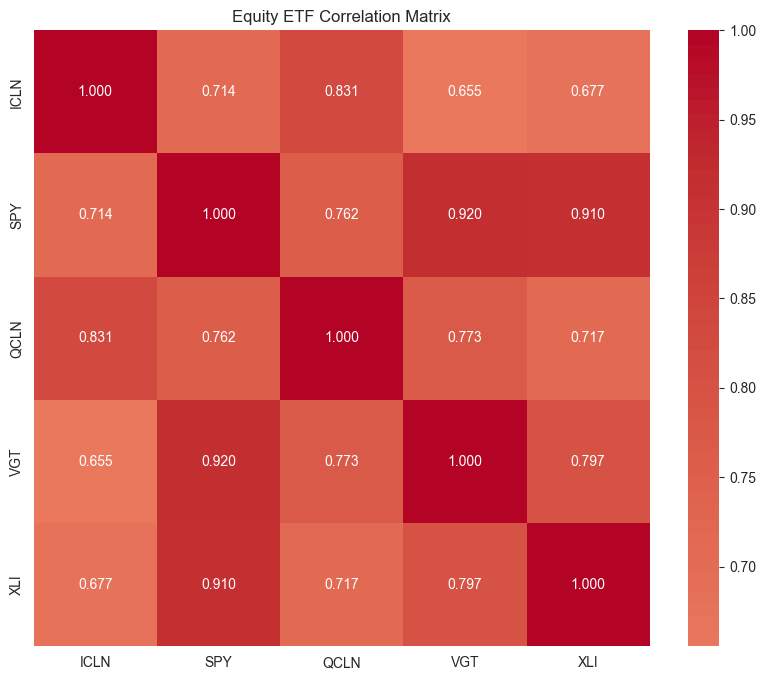

In [187]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Equity ETF Correlation Matrix')

plot_path = os.path.join(icln_plots, 'equity_correlation_matrix.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()


ICLN-SPY correlation is much lower than BGRN-AGG. A higher correlation with QCLN shows sector/tech clustering. And it actually makes sense, since QCLN is another clean energy ETF but focused on NASDAQ-listed companies.

Overall, clean energy stocks provide better diversification, even though it's still not as much as expected, than green bonds. While green bonds behave identically to traditional bonds, clean energy stocks maintain some independence from broad markets.

Plot saved to plots\icln\equity_rolling_correlation_plot.png


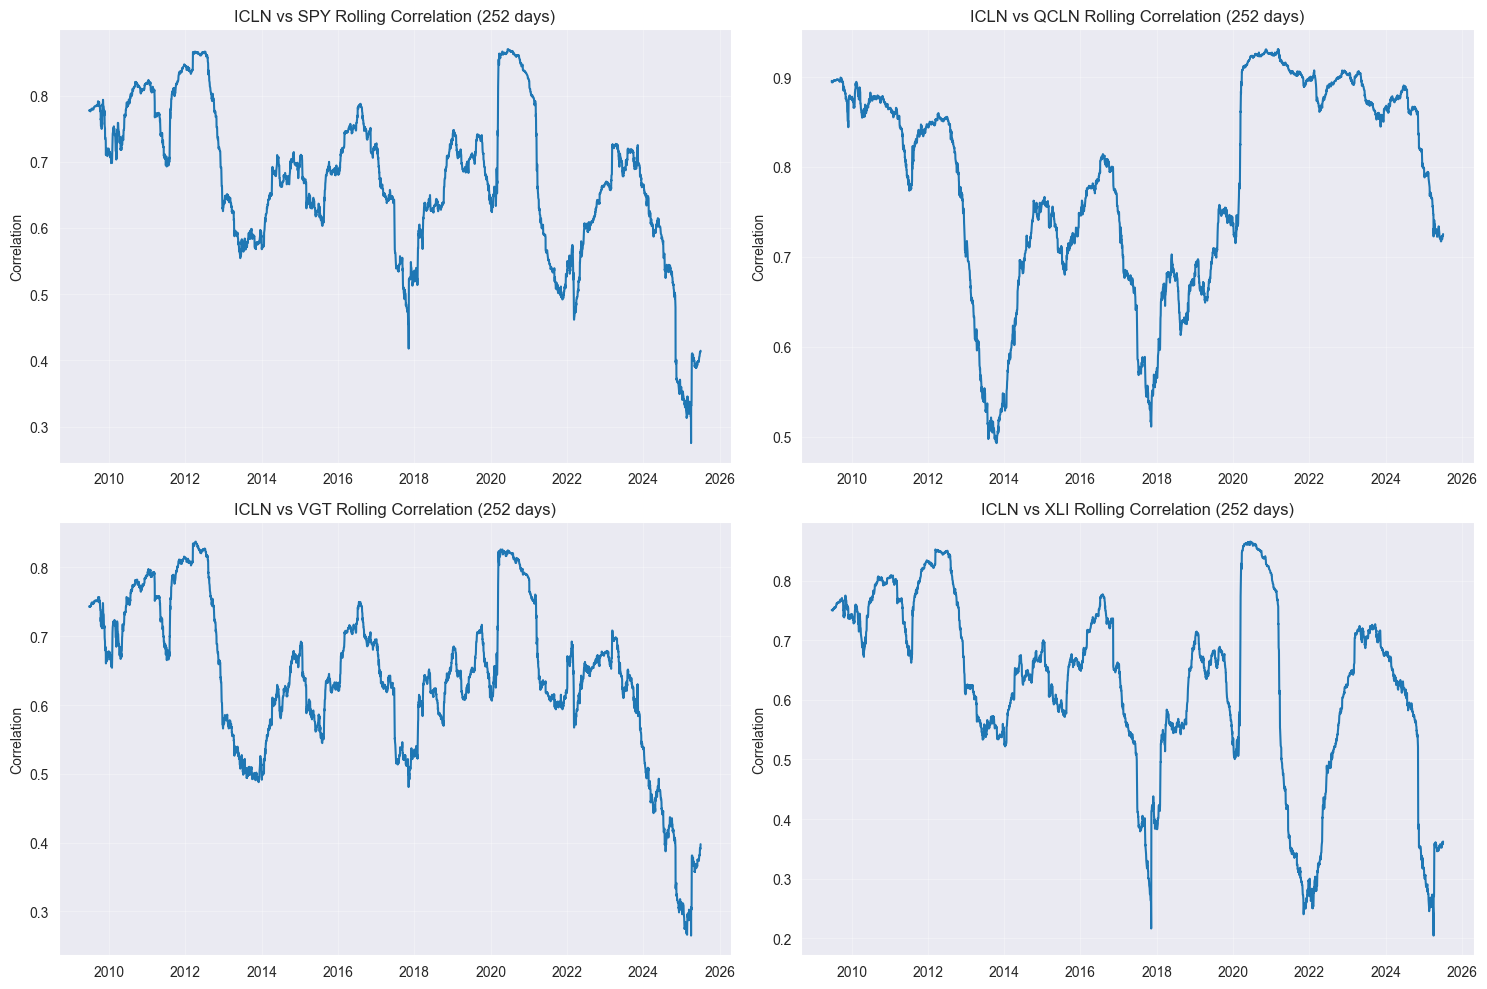

In [188]:
window = 252
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

benchmarks = ['SPY', 'QCLN', 'VGT', 'XLI']
for i, benchmark in enumerate(benchmarks):
    row, col = i // 2, i % 2
    rolling_corr = equity_returns['ICLN'].rolling(window).corr(equity_returns[benchmark])
    axes[row, col].plot(rolling_corr.index, rolling_corr.values)
    axes[row, col].set_title(f'ICLN vs {benchmark} Rolling Correlation ({window} days)')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_ylabel('Correlation')

plot_path = os.path.join(icln_plots, 'equity_rolling_correlation_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.tight_layout()
plt.show()

**TODO** This looks weird, though. The recent correlation drop is suggesting decoupling from broader markets. I should investigate it further and find a proper explanation. Potentially, it could indicate improving diversification potential.

This resource is helfpul: https://www.sciencedirect.com/science/article/pii/S2214845025000663

In [198]:
results = {}

for etf in equity_returns.columns:
    returns = equity_returns[etf]
    results[etf] = {
        'Annual_Volatility': returns.std() * np.sqrt(252),
        'Daily_Volatility': returns.std(),
        'Annual_Return': returns.mean() * 252,
        'Sharpe_Ratio': (returns.mean() / returns.std()) * np.sqrt(252),
        'Skewness': stats.skew(returns),
        'Kurtosis': stats.kurtosis(returns),
        'VaR_5%': returns.quantile(0.05),
        'CVaR_5%': returns[returns <= returns.quantile(0.05)].mean(),
        'Max_Drawdown': (returns.cumsum() - returns.cumsum().expanding().max()).min()
    }

pd.DataFrame(results).T

,Annual_Volatility,Daily_Volatility,Annual_Return,Sharpe_Ratio,Skewness,Kurtosis,VaR_5%,CVaR_5%,Max_Drawdown
ICLN,32.764168,2.063949,-0.416966,-0.012726,-0.180389,10.137610,-3.006765,-4.912155,-154.196235
SPY,20.151072,1.269398,13.070150,0.648608,0.004186,14.854268,-1.851244,-3.110438,-55.292285
QCLN,35.332469,2.225736,8.460867,0.239464,-0.080537,4.419096,-3.528567,-5.142111,-105.014301
VGT,23.881267,1.504378,18.483892,0.773991,-0.043000,8.019804,-2.405146,-3.588790,-59.474969
XLI,22.025117,1.387452,12.901545,0.585765,-0.157516,9.170550,-2.074700,-3.351886,-75.998480


**TODO** Negative Sharpe ratio doesn't make any sense. If there is no error in calculations, then it means, that investors deliberately took on much higher risk for lower returns compared to broad market.

In [190]:
events = {
    '2020-03-12': 'COVID-19',
    '2022-02-24': 'Russia Invades Ukraine',
    '2022-06-15': 'Fed 75bp Hike',
    '2023-03-10': 'SVB Collapse',
    '2019-12-11': 'EU Green Deal',
    '2022-08-16': 'Inflation Reduction Act',  # Added clean energy specific event
}

event_colors = {
    'COVID-19': 'red',
    'Russia Invades Ukraine': 'red',
    'Fed 75bp Hike': 'purple',
    'SVB Collapse': 'orange',
    'EU Green Deal': 'green',
    'Inflation Reduction Act': 'green',
}

event_dates = pd.to_datetime(list(events.keys()))
event_labels = list(events.values())

In [201]:
icln_common_modified = icln['2019-01-01':common_end]
icln_common_modified.head()

Price,Close,High,Low,Open,Volume
Ticker,ICLN,ICLN,ICLN,ICLN,ICLN
Date,,,,,
2019-01-02,7.663286,7.718550,7.561969,7.608022,63500
2019-01-03,7.598810,7.663285,7.580388,7.644864,60800
2019-01-04,7.829076,7.829076,7.663284,7.690916,35000
2019-01-07,7.893551,7.911973,7.829076,7.838287,103400
2019-01-08,7.985660,7.985660,7.875132,7.967238,61100


Price plot saved to plots\icln\icln_price_with_events.png


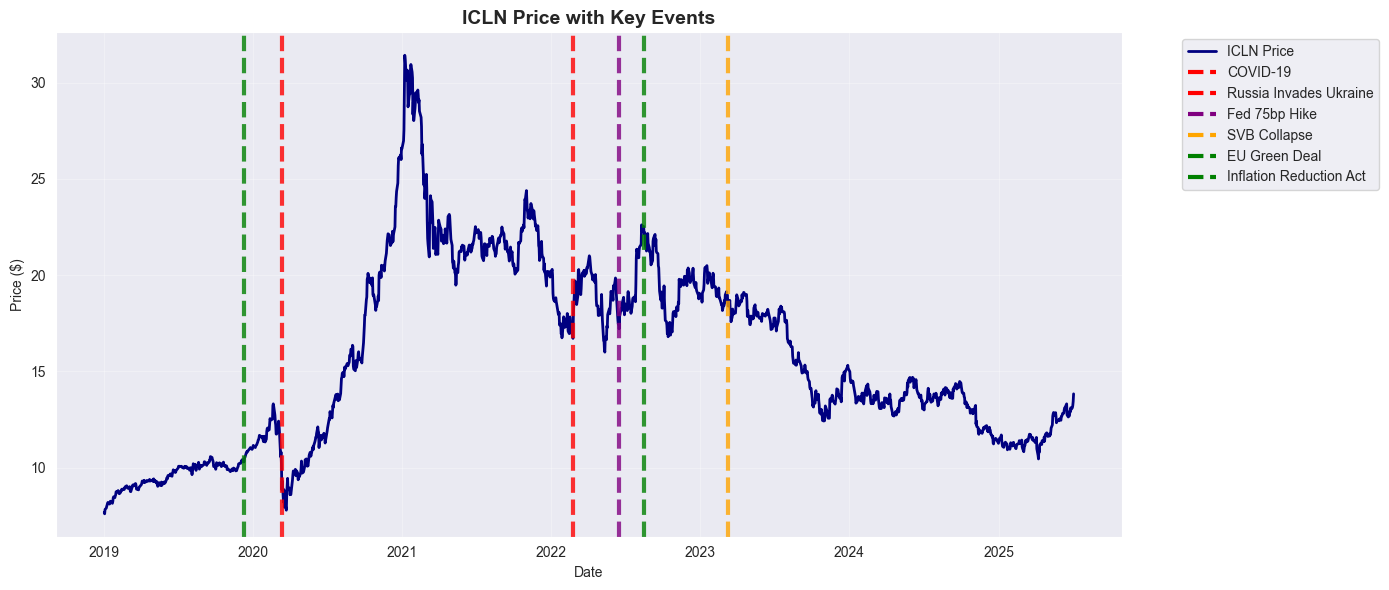

In [202]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(icln_common_modified.index, icln_common_modified[price_col], label='ICLN Price', color='navy', linewidth=2)

legend_handles = []
for date, label in zip(event_dates, event_labels):
    if date >= icln_common_modified.index[0] and date <= icln_common_modified.index[-1]:
        ax.axvline(date, color=event_colors[label], linestyle='--', linewidth=3, alpha=0.8)
        legend_handles.append(Line2D([0], [0], color=event_colors[label], linestyle='--', linewidth=3, label=f"{label}"))

ax.set_title("ICLN Price with Key Events", fontsize=14, fontweight='bold')
ax.set_ylabel("Price ($)")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3)

ax.legend(handles=[Line2D([0], [0], color='navy', linewidth=2, label='ICLN Price')] + legend_handles,
          bbox_to_anchor=(1.05, 1), loc='upper left')

plot_path_price = os.path.join(icln_plots, 'icln_price_with_events.png')
plt.savefig(plot_path_price)
print(f"Price plot saved to {plot_path_price}")

plt.tight_layout()
plt.show()

Volatility plot saved to plots\icln\icln_rolling_volatility_with_events.png


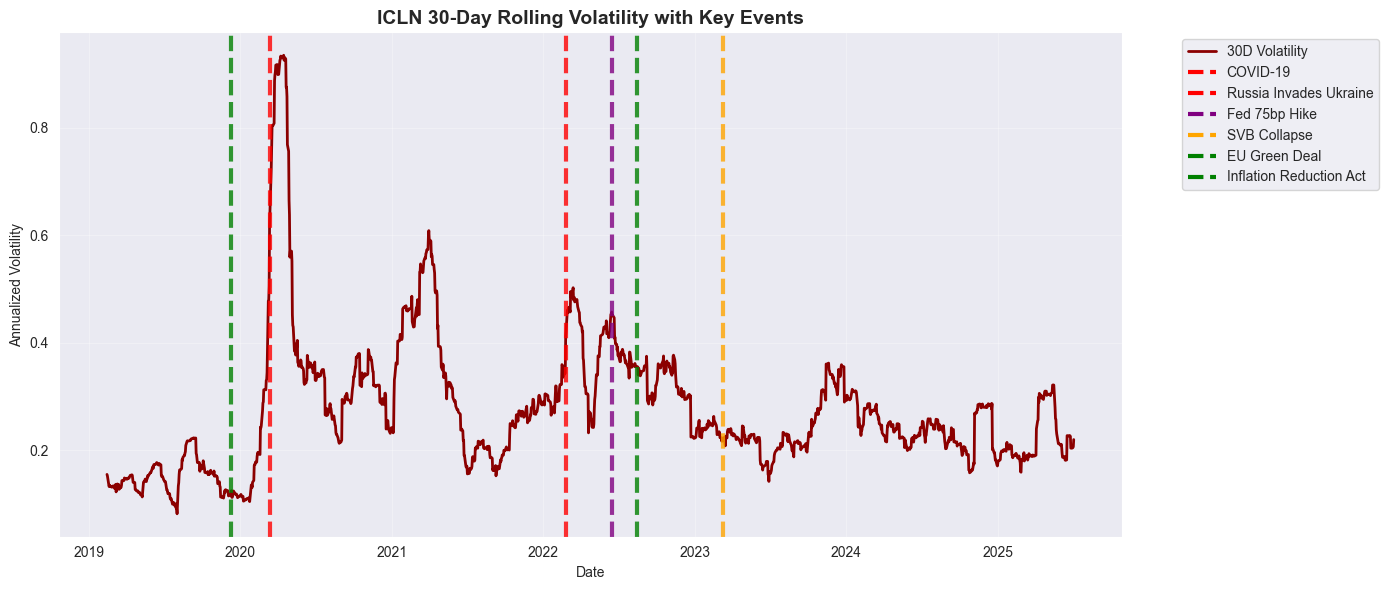

In [203]:
daily_returns = icln_common_modified[price_col].pct_change()
rolling_vol = daily_returns.rolling(30).std() * (252 ** 0.5)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(icln_common_modified.index, rolling_vol, label='30D Volatility', color='darkred', linewidth=2)

legend_handles = []
for date, label in zip(event_dates, event_labels):
    if date >= icln_common_modified.index[0] and date <= icln_common_modified.index[-1]:
        ax.axvline(date, color=event_colors[label], linestyle='--', linewidth=3, alpha=0.8)
        legend_handles.append(Line2D([0], [0], color=event_colors[label], linestyle='--', linewidth=3, label=f"{label}"))

ax.set_title("ICLN 30-Day Rolling Volatility with Key Events", fontsize=14, fontweight='bold')
ax.set_ylabel("Annualized Volatility")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3)

ax.legend(handles=[Line2D([0], [0], color='darkred', linewidth=2, label='30D Volatility')] + legend_handles,
          bbox_to_anchor=(1.05, 1), loc='upper left')

plot_path_vol = os.path.join(icln_plots, 'icln_rolling_volatility_with_events.png')
plt.savefig(plot_path_vol)
print(f"Volatility plot saved to {plot_path_vol}")

plt.tight_layout()
plt.show()

Both asset classes respond more to monetary policy and crises than to green policy events, but ICLN shows slightly more sector-specific behavior.